In [32]:
import random
import matplotlib.pyplot as plt

In [33]:
def objective_function(vector):
    v = 0.0
    for i in vector:
        v = v + i ** 2.0
    return v

In [34]:
def rand_in_bounds(min, max):
    return min + ((max-min) * random.random())

In [35]:
def random_vector(minmax):
    vector = list()
    for i in range(len(minmax)):
        rand = rand_in_bounds(minmax[i][0], minmax[i][1])
        vector.append(rand)
    return vector

In [36]:
def mutate_with_inf(candidate, beliefs, minmax):
    v = list()
    for i in range(len(candidate["vector"])):
        x = rand_in_bounds(beliefs["normative"][i][0], beliefs["normative"][i][1])
        if x < minmax[i][0]: x = minmax[i][0]
        if x > minmax[i][1]: x = minmax[i][1]
        v.append(x)
    return {"vector": v}

In [37]:
def binary_tournament(population):
    i = random.randint(0, len(population)-1)
    j = random.randint(0, len(population)-1)
    while j == i:
        j = random.randint(0, len(population)-1)
    return population[i] if (population[i]["fitness"] < population[j]["fitness"]) else population[j]

In [38]:
def initialize_population(pop_size, search_space):
    population = list()
    for i in range(pop_size):
        d = {"vector": random_vector(search_space)}
        population.append(d)
    return population

In [39]:
def initialize_beliefspace(search_space):
    belief_space = {}
    belief_space["situational"] = None
    belief_space["normative"] = list()
    for i in range(len(search_space)):
        belief_space["normative"].append(list(search_space[i]))
    return belief_space

In [40]:
def update_beliefspace_situational(belief_space, best):
    curr_best = belief_space["situational"]
    if curr_best is None or best["fitness"] < curr_best["fitness"]:
        belief_space["situational"] = best

In [41]:
def update_beliefspace_normative(belief_space, acc):
    for i in range(len(belief_space["normative"])):
        acc_min = min(acc, key = lambda v: v["vector"][i])
        belief_space["normative"][i][0] = acc_min["vector"][i]
        acc_max = max(acc, key = lambda v: v["vector"][i])
        belief_space["normative"][i][1] = acc_max["vector"][i]

In [42]:
def search(max_gens, search_space, pop_size, num_accepted):
    # initialize
    population = initialize_population(pop_size, search_space)
    belief_space = initialize_beliefspace(search_space)
    fitness_data = list()
    
    # evaluate
    for c in population:
        c["fitness"] = objective_function(c["vector"])
    best = min(population, key = lambda c: c["fitness"])
    
    # update situational knowledge
    update_beliefspace_situational(belief_space, best)
    
    # add situational_belief to fitness_data
    fitness_data.append(best["fitness"])
    
    # evolution:
    for gen in range(max_gens):
        # create new generation
        children = list()
        for c in range(pop_size):
            new_child = mutate_with_inf(population[c], belief_space, search_space)
            children.append(new_child)

        # evaluate generation
        for c in children:
            c["fitness"] = objective_function(c["vector"])
        
        # survivor selection
        new_population = list()
        for i in range(pop_size):
            survivor = binary_tournament(children + population)
            new_population.append(survivor)
        population = new_population
        
        # get new current best
        best = min(population, key = lambda c: c["fitness"])
        
        # update situational knowledge
        update_beliefspace_situational(belief_space, best)
        
        # add situational_belief to fitness_data
        fitness_data.append(best["fitness"])
        
        # update normative knowledge
        population.sort(key = lambda c: c["fitness"])
        acccepted = population[:num_accepted]
        update_beliefspace_normative(belief_space, acccepted)
        
        # user feedback
#         if gen % 10 == 0:
#             curr_best_fitness = belief_space["situational"]["fitness"]
#             print(" > generation= " + str(gen) + ", f= " + str(curr_best_fitness))
            
    return belief_space["situational"], fitness_data

In [43]:
def plot_fitness(data):
    x = list(range(len(data)))
    y = data
    plt.plot(x, y)
    plt.show()

Solution: f= 0.013959263615173132


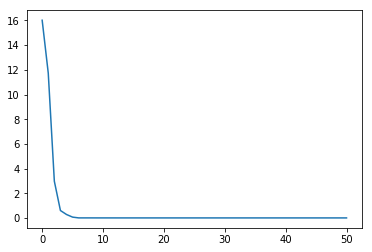

In [46]:
if __name__ == "__main__":
    # problem configuration
    problem_size = 5
    search_space = list()
    for i in range(problem_size):
      search_space.append([-5, 5])
    
    # algorithm configuration
    max_gens = 50
    pop_size = 50
    num_accepted = round(pop_size * 0.20)
    
    # execute the algorithm
    best, fitness_data = search(max_gens, search_space, pop_size, num_accepted)
    best_fitness = best["fitness"]
    best_vector = best["vector"]
    print("Solution: f= " + str(best_fitness)) # + ", s= " + str(best_vector))
    plot_fitness(fitness_data)